<a href="https://colab.research.google.com/github/Rakeshyrc/fraud-Detection-ML/blob/main/fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

click on cell hidden

# **Importing Packages**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import warnings, copy
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# **loading data**

In [ ]:
# Load data
data = pd.read_csv("/content/onlinefraudsmall.csv")
print(data.shape)
data.head(1)

(1048575, 10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0


# **analysis and cleaning**

In [ ]:
data.describe().round(3)
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
# Drop rows with missing values
data.dropna(subset=['isFraud'], inplace=True)
# Convert "isFraud" columns from float to int
data['isFraud'] = data['isFraud'].astype(int)

In [ ]:
data.describe().round(3)
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


The average step is 23.98 hours.
The average amount is 162,426.70.
The average oldbalanceOrg is 884,346.10.
The average newbalanceOrig is 905,079.70.
The average oldbalanceDest is 987,699.90.
The average newbalanceDest is 1,131,526.00.
The percentage of fraudulent transactions is 0.054%.


* The average amount of a fraudulent transaction is much higher than the average amount of a non-fraudulent transaction. This is something that we will need to keep in mind when we build our machine learning model.




In [ ]:
# Check duplicate values
data=data
data.duplicated().sum()

0

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


step: This column represents the time in hours since the start of the dataset. It is not necessary for fraud detection.
nameDest: This column is the name of the recipient of the transaction. It is not necessary for fraud detection.
oldbalanceDest: This column is the balance of the recipient's account before the transaction. It is not necessary for fraud detection.

Now data look clean and now can do the EDA to gain few insights from the data

# **EDA**

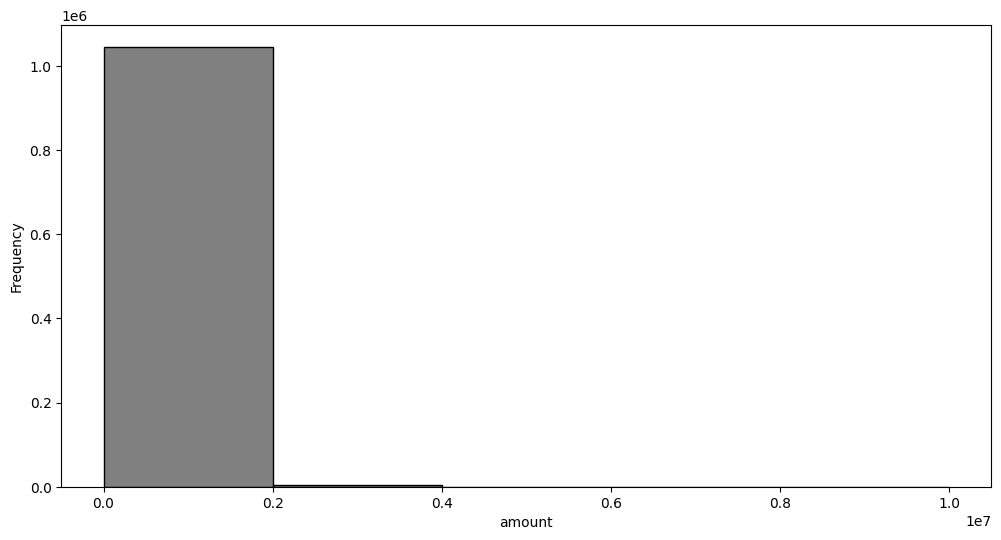

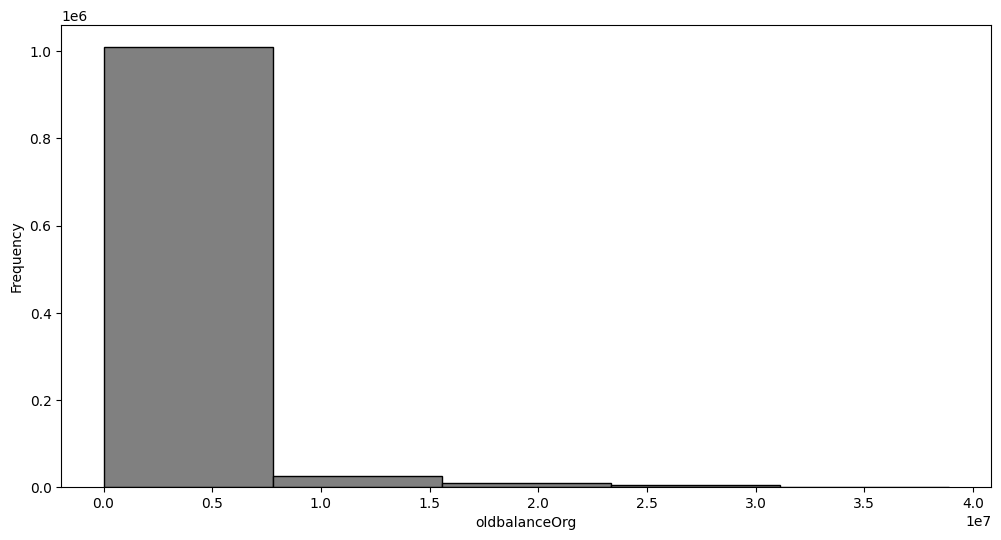

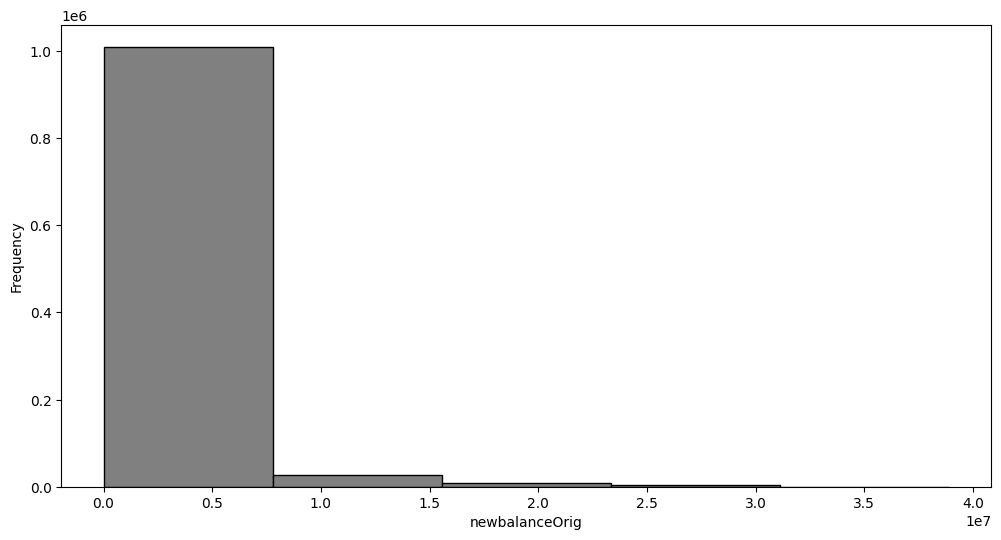

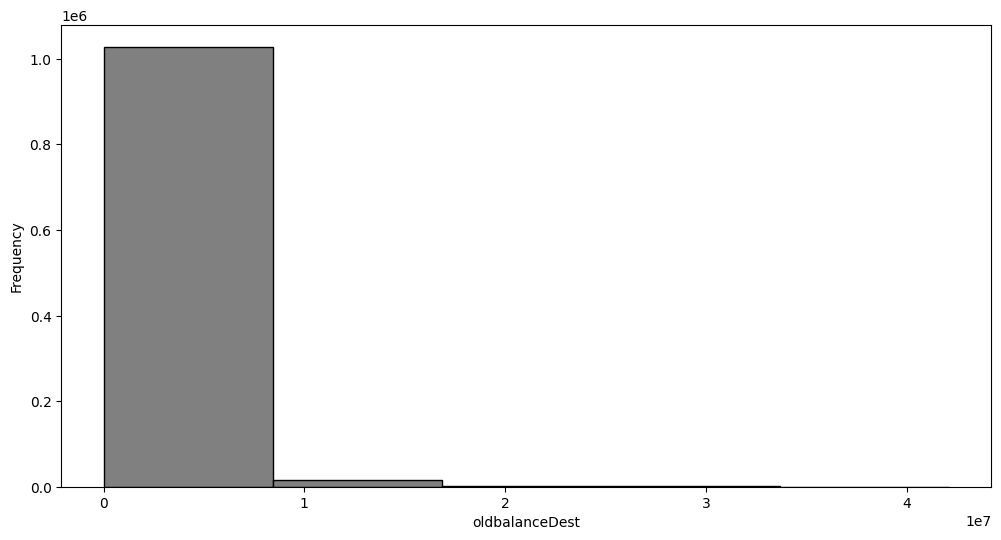

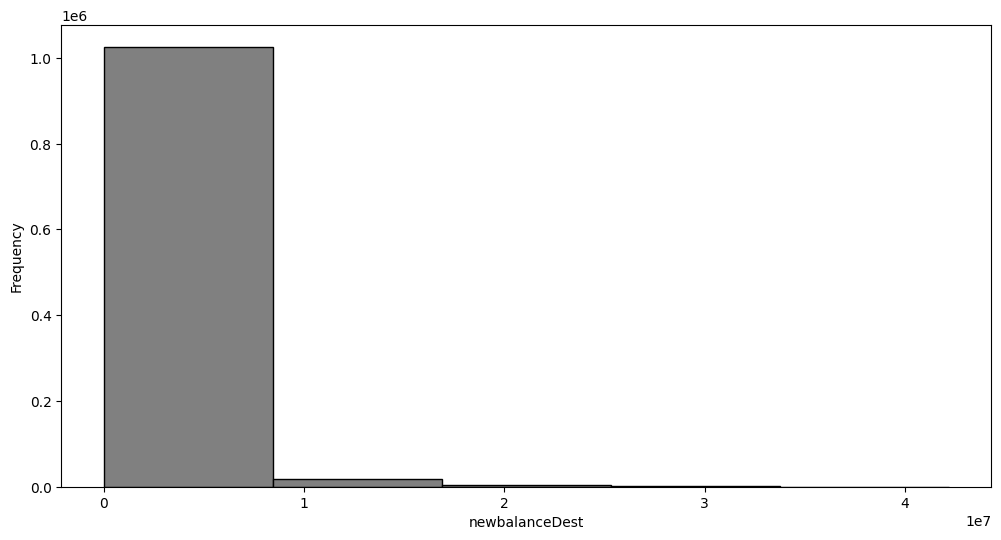

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

* By this plot we can see the distbunce in data due to outliers
* In our case or data it is better to go with capping & flooring than removing data.

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(data[i].quantile(0.10))
    print(data[i].quantile(0.90))

    print('\n')

amount
4220.57
373075.3779999999


oldbalanceOrg
0.0
1924613.1739999996


newbalanceOrig
0.0
2059503.9359999998


oldbalanceDest
0.0
2721593.4459999995


newbalanceDest
0.0
3102896.2




In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.7964930444208819


Feature:  oldbalanceOrg
Skewness value:  2.1881516694642875


Feature:  newbalanceOrig
Skewness value:  2.1770209559093807


Feature:  oldbalanceDest
Skewness value:  1.385454781137203


Feature:  newbalanceDest
Skewness value:  1.3046789943177446




now lets look into the data by ploting after dealing with the outliers

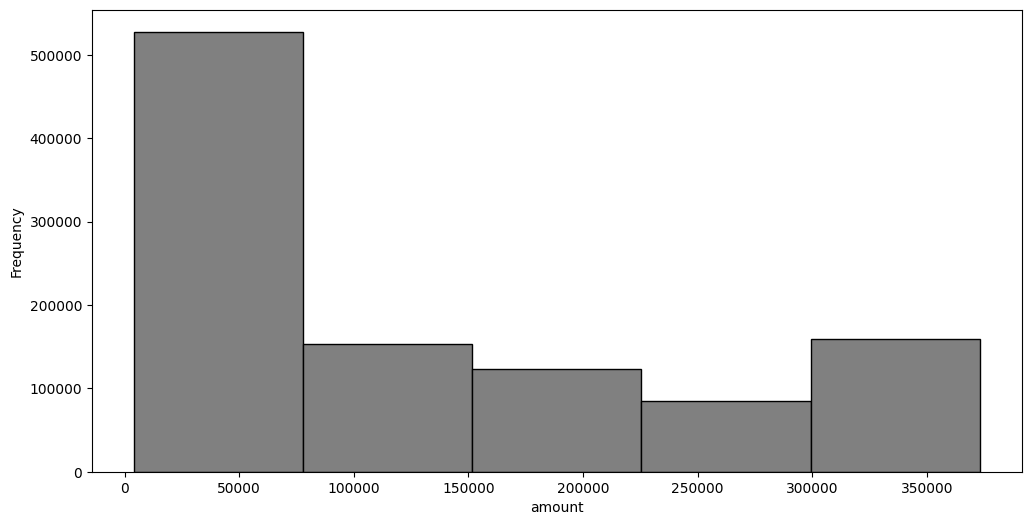

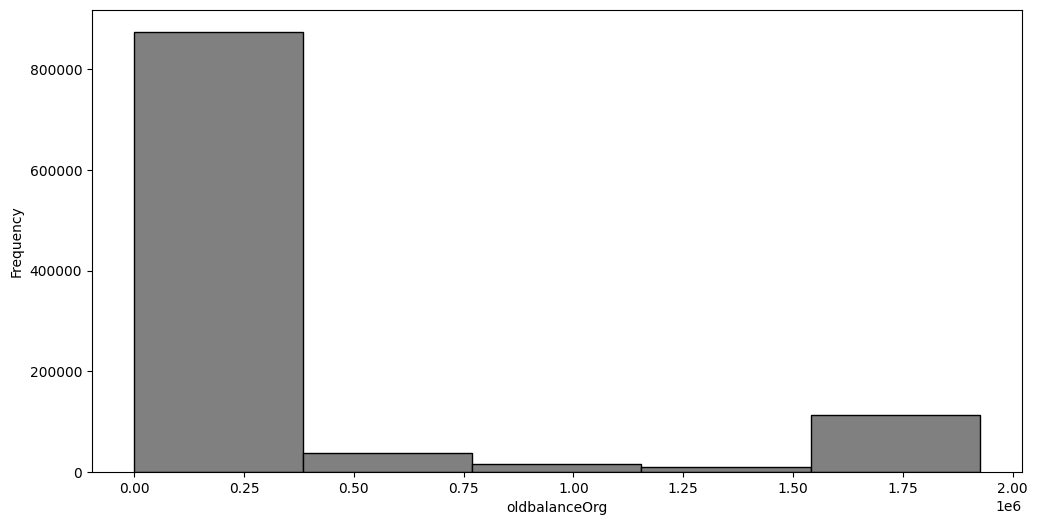

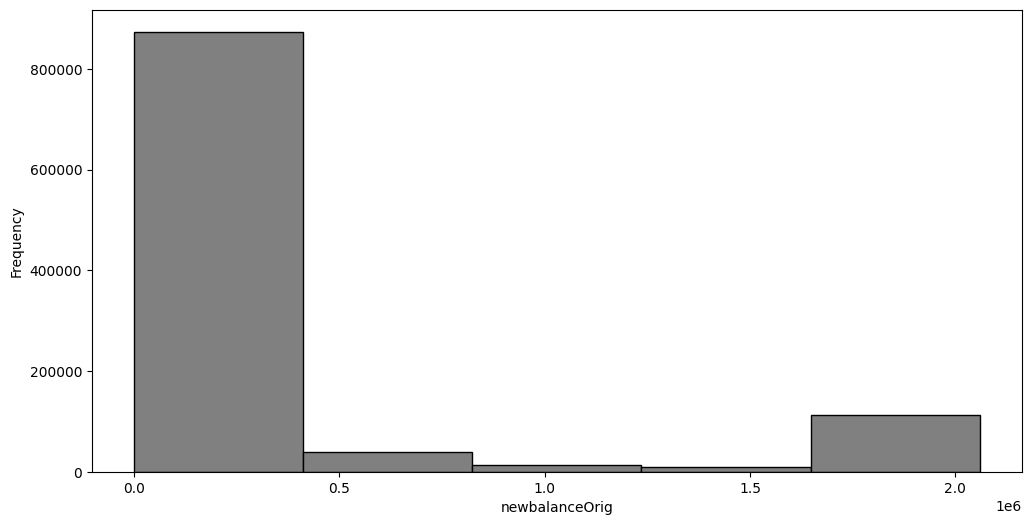

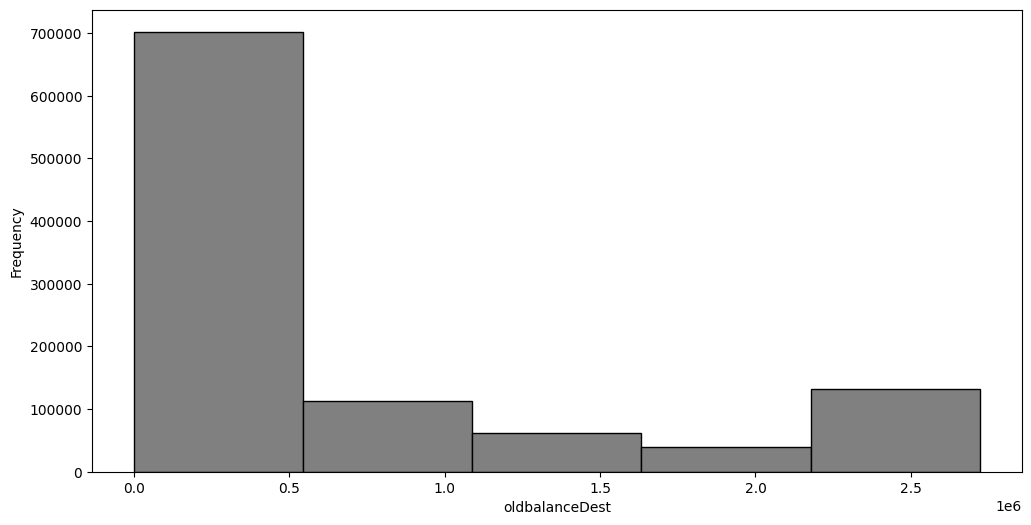

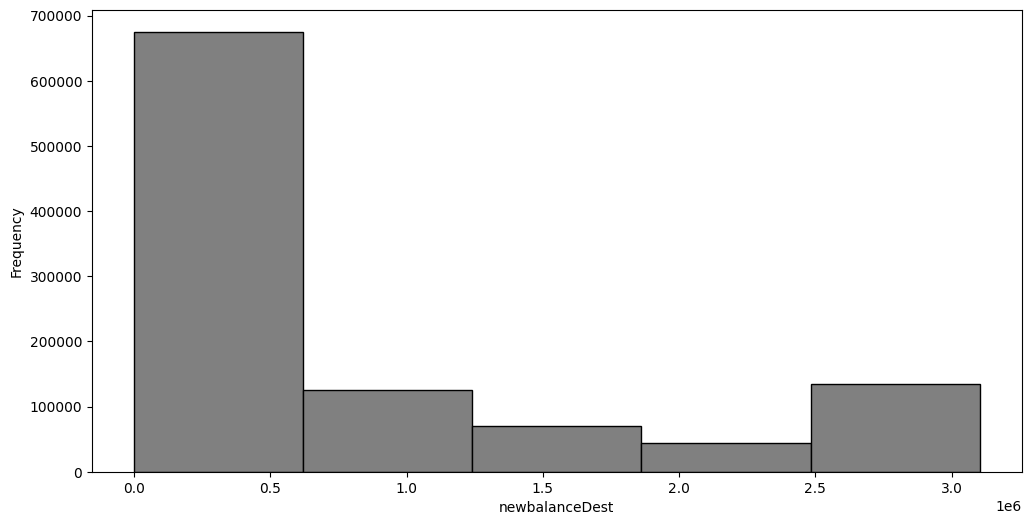

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

In [ ]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
payment = data.type.value_counts()
payment

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

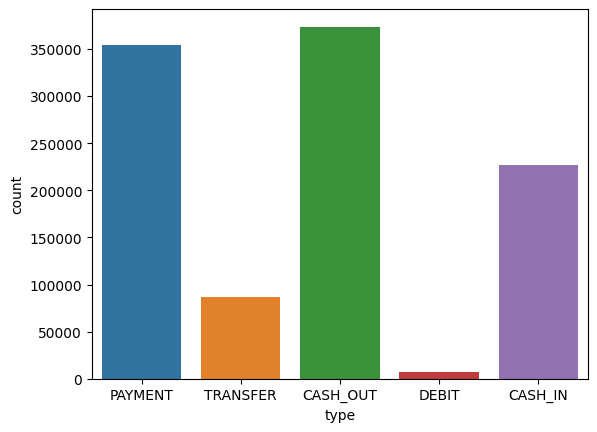

In [ ]:
sns.countplot(x='type', data=data)

* by the above visulization we can see the most transactions take place by CASH_OUT followed by PAYMENT
 * But this is not the usefull thing because we need to find relationship with type column with fraud

In [ ]:
pivot_=pd.crosstab(index=data.type,columns=data.isFraud)
pivot_

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


<Figure size 700x400 with 0 Axes>

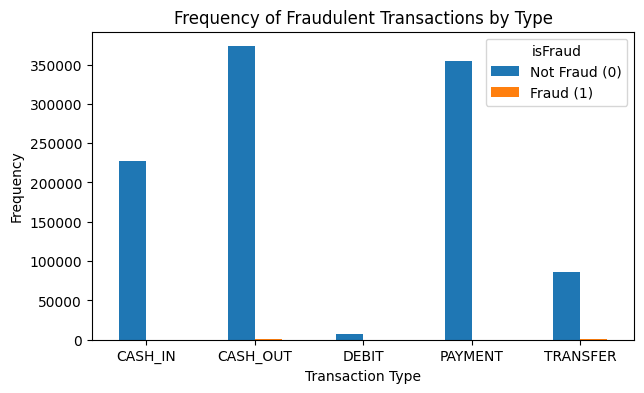

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
pivot_.plot.bar( figsize=(7, 4), rot=0)
plt.title('Frequency of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.legend(title='isFraud', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()


the numbers indicating fraud happened with fraud not happened is very low so apply logscale to visullize good

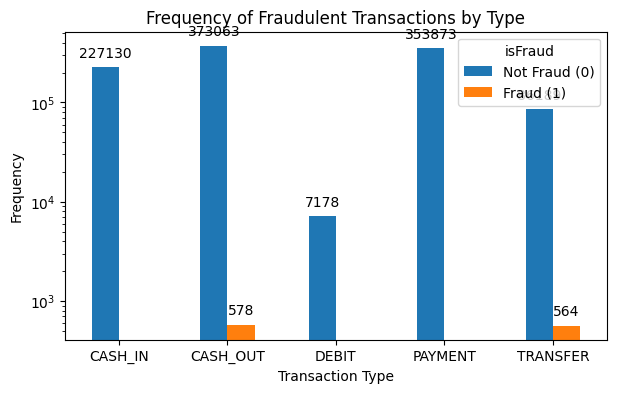

In [ ]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = pivot_.plot.bar(logy=True,figsize=(7, 4), rot=0, ax=plt.gca())

# Annotate each bar with its respective frequency value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title and labels to the plot
plt.title('Frequency of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.legend(title='isFraud', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()


* Now after applying logscale and labling we can we can visullize it good
 * From this we can say it is unbalanced data
 * only in Cashout and Transfer we can see the fraud


In [ ]:
pivot_

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [ ]:
cashout=	373063+578
cashout_fraud= 578/(cashout) * 100
cashout_fraud

0.15469394418706728

In [ ]:
transfer= 86189+564
transfer_fraud = 564/(transfer) * 100
transfer_fraud

0.6501216096273328

from the both this above observation
* 0.154% of frauds happend in total at cashout
* 0.650% of frauds happen in total at transfer

in this both cases the % of fraud occured is very less

In [ ]:
data.amount

0            9839.64
1            4220.57
2            4220.57
3            4220.57
4           11668.14
             ...    
1048570    132557.35
1048571      9917.36
1048572     14140.05
1048573     10020.05
1048574     11450.03
Name: amount, Length: 1048575, dtype: float64

In [ ]:
print('Minimum: ',data.amount.min())
print('Maximum: ',data.amount.max())

Minimum:  4220.57
Maximum:  373075.3779999999


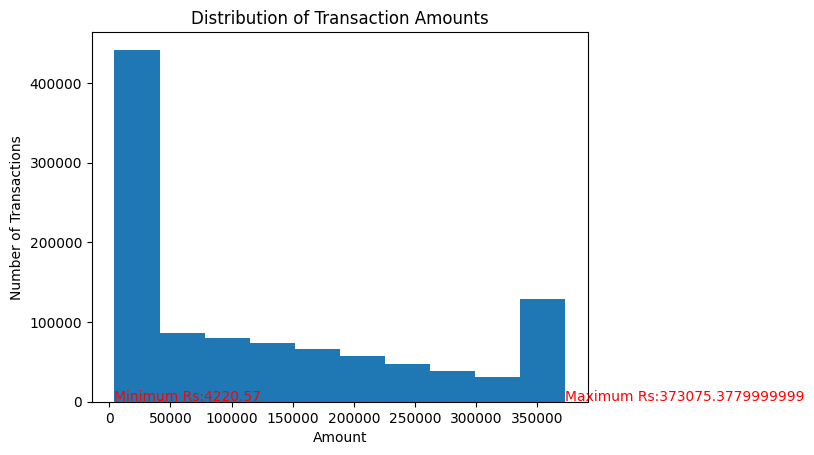

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data.amount)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.annotate('Minimum Rs:' + str(data.amount.min()), (data.amount.min(), 1000), color='red')
plt.annotate('Maximum Rs:' + str(data.amount.max()), (data.amount.max(), 1000), color='red')
plt.show()


Lowest amount transaction starts from 4220.57 and highest amount transaction goes upto 3.7 lakh

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

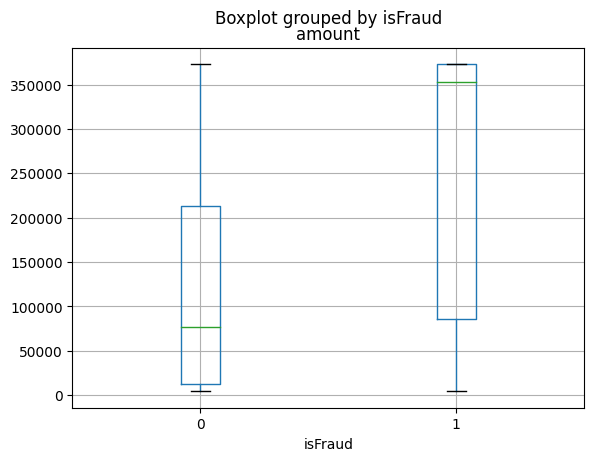

In [ ]:
data.boxplot(column='amount', by='isFraud')

Fraud amount transaction range is between 75k-3.7 lakh

In [ ]:
total_transactions = data.shape[0]

fraud_transaction = data[data.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100

In [ ]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  1048575
Total fraud transactions happened:  1142
Total fraud transaction percent:  0.11


once again is shows that the dataset is very much imbalanced

In [ ]:
fraud_amount= data[data.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1025194,48,CASH_OUT,373075.378,C274359236,1215297.01,0.0,C1653022223,2497294.92,3102896.20,1
992140,45,TRANSFER,373075.378,C1582972194,1069508.42,0.0,C284364603,0.00,0.00,1
955157,44,TRANSFER,373075.378,C369936121,1649818.97,0.0,C1347315975,0.00,0.00,1
955158,44,CASH_OUT,373075.378,C2052172437,1649818.97,0.0,C1401780750,560704.68,2210523.64,1
956900,44,TRANSFER,373075.378,C374179954,387952.42,0.0,C1213274351,0.00,0.00,1


<Axes: ylabel='Frequency'>

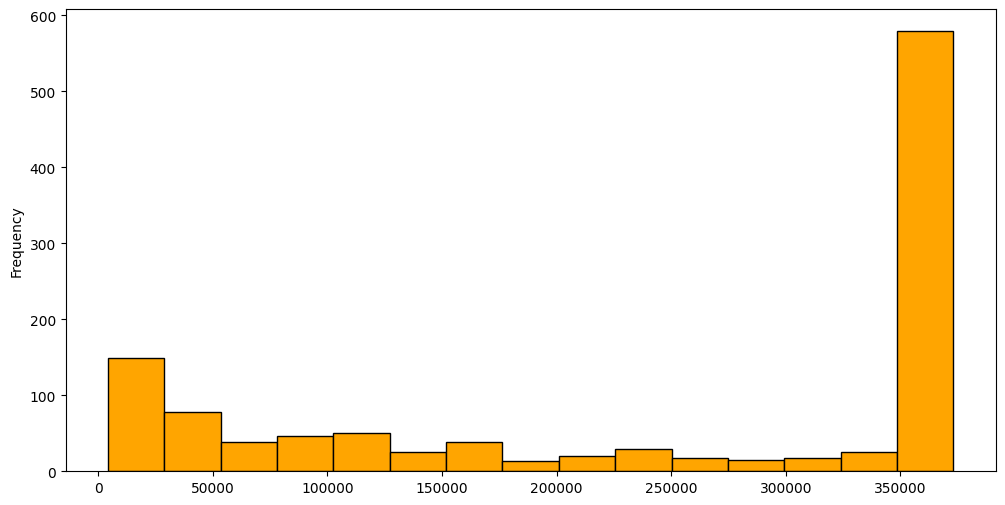

In [ ]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

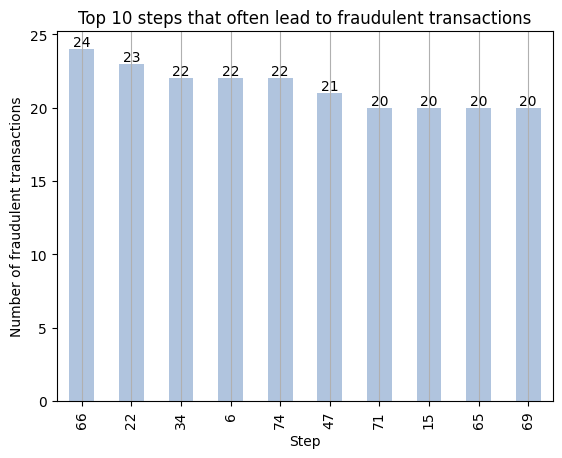

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = data[data['isFraud'] == 1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

Step 66 has the highest number of fraudulent transactions, 24 cases.
This indicates that Step 66 is the step that will most likely lead to fraudulent transactions.

In [ ]:
fraudster= data.nameDest.value_counts()
fraudster

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [ ]:
fraudster[:10]

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: nameDest, dtype: int64

<Axes: >

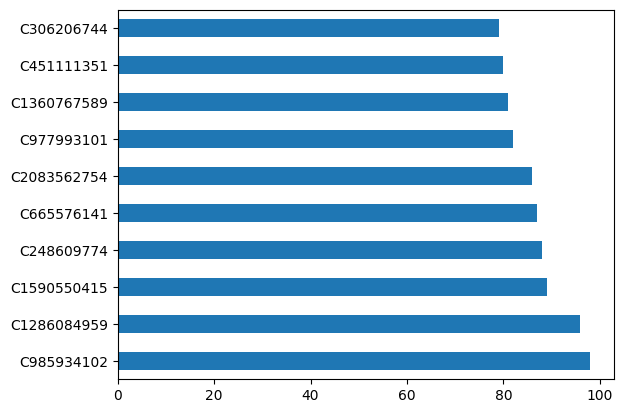

In [ ]:
fraudster[:10].plot(kind='barh')

the above nameDest are the top 10 fraud people with most fraud transfers

# **Correlation**

Text(0.5, 1.0, 'Correlation')

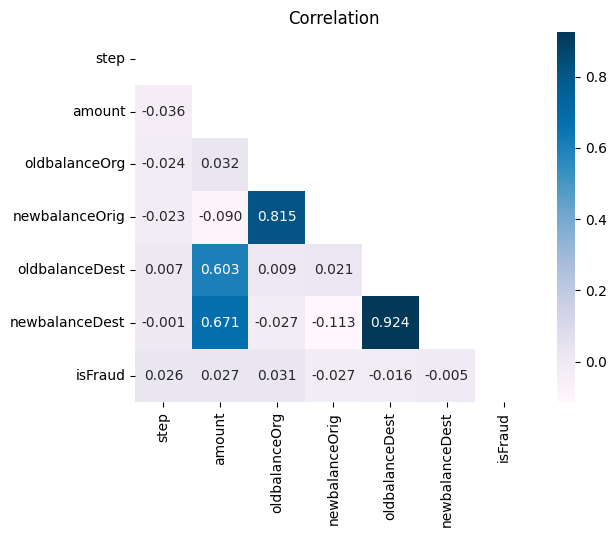

In [ ]:
corr_viz=data.corr('spearman')
sns.heatmap(corr_viz, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_viz, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

oldbalanceOrg and newbalanceOrig has strong positive relationship.

oldbalanceDest and newbalanceDest has strong positive relationship.

oldbalanceOrg and amount has weak positive relationship.
newbalanceOrig and amount has moderate positive relationship.

<Axes: >

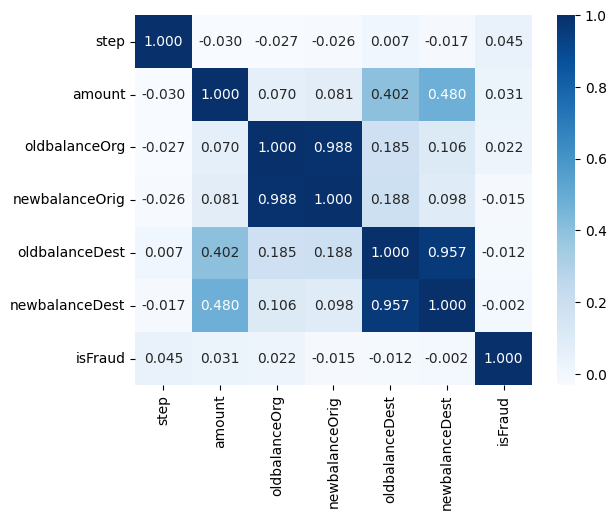

In [ ]:
# calculate correlation matrix
corr_viz_=data.corr()# plot the heatmap
sns.heatmap(corr_viz_, xticklabels=corr_viz_.columns, yticklabels=corr_viz_.columns, annot=True, cmap='Blues' ,fmt=".3f")

There is a high correlation between newbalanceOrig and oldbalanceOrg.

Also, between newbalanceDest and oldbalanceDest.

Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

# **ML-1 undersampling**
* LogisticRegression

* DecisionTreeClassifier

In [ ]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0


In [ ]:
data['type'] = data['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,3,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,0,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,0,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,0,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,0,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [ ]:
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [ ]:
legit_txns = data[data.isFraud == 0]
fraud_txns = data[data.isFraud == 1]
print(legit_txns.shape)
print(fraud_txns.shape)

(1047433, 10)
(1142, 10)


In [ ]:
legit_txns.amount.describe()

count    1.047433e+06
mean     1.245376e+05
std      1.274023e+05
min      4.220570e+03
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      3.730754e+05
Name: amount, dtype: float64

In [ ]:
fraud_txns.amount.describe()

count      1142.000000
mean     244888.761771
std      147608.445455
min        4220.570000
25%       86070.170000
50%      353179.450000
75%      373075.378000
max      373075.378000
Name: amount, dtype: float64

In [ ]:
data.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,,
0,26.942944,1.628201,124537.621231,282355.693234,301199.630364,628647.193083,756468.424830
1,48.272329,3.493870,244888.761771,680396.344785,12160.949974,289896.950280,680440.622531


In [ ]:
# Samples 1142 transactions out of the legit transactions
legit_sample = legit_txns.sample(n=1142)
# Concatenates all the 8213 the fraud_txns and the 8213 samples of the legit txns
undersampled_dataset = pd.concat([legit_sample, fraud_txns], axis=0)

In [ ]:
undersampled_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1034987,93,0,11734.77,C721119557,0.000,0.000,M1704463008,0.000,0.00,0
353970,17,1,100056.56,C2133526124,1924613.174,2059503.936,C1785360415,2721593.446,3102896.20,0
610370,34,4,88539.69,C894854186,0.000,0.000,C1477895198,118482.300,207021.99,0
1012602,46,0,4220.57,C2136346643,31243.000,30385.580,M1831195037,0.000,0.00,0
881056,42,1,8198.67,C84501064,509053.000,517251.670,C18596597,892674.330,884475.66,0


In [ ]:
undersampled_dataset['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [ ]:
undersampled_dataset.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,,
0,27.362522,1.60683,125115.904131,307858.468891,326275.669089,650557.984825,780581.740298
1,48.272329,3.49387,244888.761771,680396.344785,12160.949974,289896.950280,680440.622531


In [ ]:
data.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,,
0,26.942944,1.628201,124537.621231,282355.693234,301199.630364,628647.193083,756468.424830
1,48.272329,3.493870,244888.761771,680396.344785,12160.949974,289896.950280,680440.622531


In [ ]:
X = undersampled_dataset.drop(columns=['isFraud','nameDest','nameOrig'], axis=1)
# Remove the class column from the undersampled dataset
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1034987,93,0,11734.77,0.000,0.000,0.000,0.00
353970,17,1,100056.56,1924613.174,2059503.936,2721593.446,3102896.20
610370,34,4,88539.69,0.000,0.000,118482.300,207021.99
1012602,46,0,4220.57,31243.000,30385.580,0.000,0.00
881056,42,1,8198.67,509053.000,517251.670,892674.330,884475.66


In [ ]:
Y = undersampled_dataset['isFraud']
Y

1034987    0
353970     0
610370     0
1012602    0
881056     0
          ..
1047888    1
1048221    1
1048222    1
1048323    1
1048324    1
Name: isFraud, Length: 2284, dtype: int64

In [ ]:
X_train_undersampled, X_test_undersampled, Y_train_undersampled, Y_test_undersampled = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train_undersampled.shape, X_test_undersampled.shape)

(2284, 7) (1827, 7) (457, 7)


In [ ]:
scaler = StandardScaler()
X_train_scaled_undersampled = scaler.fit_transform(X_train_undersampled)
X_test_scaled_undersampled = scaler.transform(X_test_undersampled)

In [ ]:
LogisticRegressionModel = LogisticRegression()
SVM_SVC_Model_CLF = SVC(kernel='linear')
NaiveBayes_Model_CLF = GaussianNB()
KNN_Model_CLF = KNeighborsClassifier(n_neighbors=5)
DecisionTree_Model = DecisionTreeClassifier()
params = {'max_depth': [2, 4, 6, 8, 10],
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 2, 3, 4, 5]}
DecisionTree_GridSearch_CLF = GridSearchCV(DecisionTree_Model, params, cv=5)

In [ ]:
LogisticRegressionModel.fit(X_train_scaled_undersampled, Y_train_undersampled)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = LogisticRegressionModel.predict(X_train_scaled_undersampled)
LR_undersampling_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_undersampled)
print('Accuracy on Training data : ', LR_undersampling_training_data_accuracy)
LR_undersampling_training_data_classification_report = classification_report(X_train_prediction, Y_train_undersampled)
print('\nClassification Report on Training data : \n', LR_undersampling_training_data_classification_report)

Accuracy on Training data :  0.9102353585112206

Classification Report on Training data : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       911
           1       0.91      0.91      0.91       916

    accuracy                           0.91      1827
   macro avg       0.91      0.91      0.91      1827
weighted avg       0.91      0.91      0.91      1827



In [ ]:
# accuracy on test data
X_test_prediction = LogisticRegressionModel.predict(X_test_scaled_undersampled)
LR_undersampling_test_data_accuracy = accuracy_score(X_test_prediction, Y_test_undersampled)
print('Accuracy score on Test Data : ', LR_undersampling_test_data_accuracy)
LR_undersampling_testing_data_classification_report = classification_report(X_test_prediction, Y_test_undersampled)
print('\nClassification Report on Training data : \n', LR_undersampling_testing_data_classification_report)

Accuracy score on Test Data :  0.912472647702407

Classification Report on Training data : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       231
           1       0.91      0.92      0.91       226

    accuracy                           0.91       457
   macro avg       0.91      0.91      0.91       457
weighted avg       0.91      0.91      0.91       457



In [ ]:
DecisionTree_Model.fit(X_train_scaled_undersampled, Y_train_undersampled)

DecisionTreeClassifier()

In [ ]:
# accuracy on training data
X_train_prediction = DecisionTree_Model.predict(X_train_scaled_undersampled)
DT_undersampling_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_undersampled)
print('Accuracy on Training data : ', DT_undersampling_training_data_accuracy)
DT_undersampling_training_data_classification_report = classification_report(X_train_prediction, Y_train_undersampled)
print('\nClassification Report on Training data : \n', DT_undersampling_training_data_classification_report)

Accuracy on Training data :  1.0

Classification Report on Training data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       914

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



In [ ]:
# accuracy on test data
X_test_prediction = DecisionTree_Model.predict(X_test_scaled_undersampled)
DT_undersampling_test_data_accuracy = accuracy_score(X_test_prediction, Y_test_undersampled)
print('Accuracy score on Test Data : ', DT_undersampling_test_data_accuracy)
DT_undersampling_testing_data_classification_report = classification_report(X_test_prediction, Y_test_undersampled)
print('\nClassification Report on Training data : \n', DT_undersampling_testing_data_classification_report)

Accuracy score on Test Data :  0.973741794310722

Classification Report on Training data : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       231
           1       0.97      0.98      0.97       226

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



# **ML2**
* Random Forest Classifier
* Gradient Boosting

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
# Initialize Random Forest Classifier
rf_classifier_undersampled = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the Random Forest model on the undersampled data
rf_classifier_undersampled.fit(X_train_undersampled, Y_train_undersampled)

# Predict on the test set
rf_predictions_undersampled = rf_classifier_undersampled.predict(X_test_undersampled)

# Evaluate Random Forest Classifier
print("Random Forest Classifier Results on Undersampled Data:")
print("Accuracy:", accuracy_score(Y_test_undersampled, rf_predictions_undersampled))
print("Precision:", precision_score(Y_test_undersampled, rf_predictions_undersampled))
print("Recall:", recall_score(Y_test_undersampled, rf_predictions_undersampled))
print("F1 Score:", f1_score(Y_test_undersampled, rf_predictions_undersampled))
print("ROC AUC Score:", roc_auc_score(Y_test_undersampled, rf_classifier_undersampled.predict_proba(X_test_undersampled)[:,1]))

# Initialize Gradient Boosting Classifier
gb_classifier_undersampled = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the undersampled data
gb_classifier_undersampled.fit(X_train_undersampled, Y_train_undersampled)

# Predict on the test set
gb_predictions_undersampled = gb_classifier_undersampled.predict(X_test_undersampled)

# Evaluate Gradient Boosting Classifier
print("\nGradient Boosting Classifier Results on Undersampled Data:")
print("Accuracy:", accuracy_score(Y_test_undersampled, gb_predictions_undersampled))
print("Precision:", precision_score(Y_test_undersampled, gb_predictions_undersampled))
print("Recall:", recall_score(Y_test_undersampled, gb_predictions_undersampled))
print("F1 Score:", f1_score(Y_test_undersampled, gb_predictions_undersampled))
print("ROC AUC Score:", roc_auc_score(Y_test_undersampled, gb_classifier_undersampled.predict_proba(X_test_undersampled)[:,1]))


Random Forest Classifier Results on Undersampled Data:
Accuracy: 0.973741794310722
Precision: 0.9695652173913043
Recall: 0.9780701754385965
F1 Score: 0.9737991266375545
ROC AUC Score: 0.994857504022064

Gradient Boosting Classifier Results on Undersampled Data:
Accuracy: 0.975929978118162
Precision: 0.9656652360515021
Recall: 0.9868421052631579
F1 Score: 0.9761388286334057
ROC AUC Score: 0.9961694629587069


# **PREDICTION**
* Random Forest Classifier

In [ ]:
# Define features and target
X = undersampled_dataset.drop(columns=['isFraud','nameDest','nameOrig'], axis=1)
Y = undersampled_dataset['isFraud']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train Random Forest Classifier
rf_classifier_undersampled = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier_undersampled.fit(X_train, Y_train)

# User input for new data
user_input = {
    'step': int(input("Enter step: ")),
    'type': int(input("Enter transaction type (0: PAYMENT, 1: TRANSFER, 2: CASH_OUT): ")),
    'amount': float(input("Enter transaction amount: ")),
    'oldbalanceOrg': float(input("Enter old balance of origin account: ")),
    'newbalanceOrig': float(input("Enter new balance of origin account: ")),
    'oldbalanceDest': float(input("Enter old balance of destination account: ")),
    'newbalanceDest': float(input("Enter new balance of destination account: "))
}

# Create a DataFrame from user input
user_new_data = pd.DataFrame(user_input, index=[0])

# Make prediction using the trained Random Forest model
user_new_data_predictions = rf_classifier_undersampled.predict(user_new_data)

# Print the prediction
if user_new_data_predictions[0] == 1:
    print("Prediction for the new data: Fraudulent")
else:
    print("Prediction for the new data: Not Fraudulent")


KeyboardInterrupt: ignored